In [1]:
import pandas as pd

# Upload file dari lokal ke Colab
from google.colab import files
uploaded = files.upload()  # Upload True.csv dan Fake.csv


In [2]:
# Load dataset
df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

# Tambahkan label
df_true['label'] = 1  # REAL
df_fake['label'] = 0  # FAKE

# Gabungkan
df = pd.concat([df_true, df_fake], ignore_index=True)

# Acak data
df = df.sample(frac=1).reset_index(drop=True)


In [4]:
df

,title,text,subject,date,label
0,WATCH: Kellyanne Conway Pathetically Begs Peo...,Donald Trump is clearly using the office of th...,News,"February 9, 2017",0
1,MOVIEGOING HITS 22-YR LOW…LA Times Blames Ever...,The LA Times is reporting that moviegoing is a...,politics,"Dec 24, 2017",0
2,"Exclusive: Overruling diplomats, U.S. to drop ...",WASHINGTON (Reuters) - In a highly unusual int...,politicsNews,"June 23, 2017",1
3,Yemen humanitarian situation likely to worsen ...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,worldnews,"December 6, 2017",1
4,GOP Board Of Education Candidate May Be The C...,There have been plenty of accusations made aga...,News,"February 19, 2016",0
...,...,...,...,...,...
44893,“RACIST” President Jackson To Be Replaced With...,Obama has filled his cabinet with radical yes...,politics,"Apr 18, 2016",0
44894,Trump’s America: White Supremacist Blogger Gi...,The most controversial judicial nominee on Pre...,News,"July 23, 2017",0
44895,Queen Elizabeth praises British spirit in Chri...,"SANDRINGHAM, England (Reuters) - Britain s Que...",worldnews,"December 25, 2017",1
44896,Honduran presidential candidate to review U.S....,TEGUCIGALPA (Reuters) - The Honduran president...,worldnews,"November 28, 2017",1


In [6]:
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')

# Gabungkan title dan text (jika ada)
df['content'] = df['title'] + ' ' + df['text']

# Split data
X = df['content']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Akurasi: 0.9863028953229399

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4756
           1       0.98      0.99      0.99      4224

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



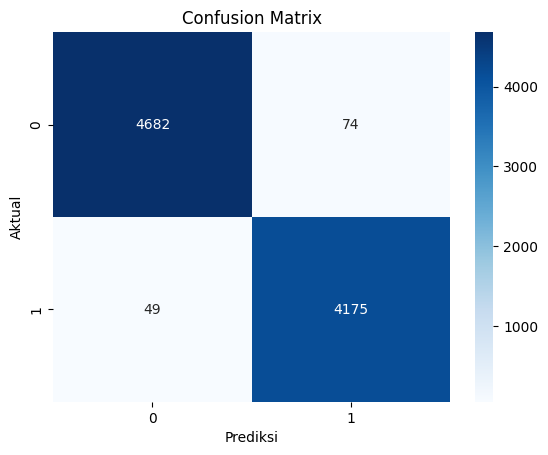

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Prediksi
y_pred = model.predict(X_test_vec)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()


In [8]:
def predict_news(news_text):
    vec = tfidf.transform([news_text])
    pred = model.predict(vec)[0]
    return "REAL ✅" if pred == 1 else "FAKE 🚫"

# Contoh penggunaan
news_example = " Legislation to provide $81 billion in new disaster aid for U.S. states, Puerto Rico and the U.S. Virgin Islands was put on hold by the Senate on Thursday amid attacks from both Republicans and Democrats. The Republican-controlled House of Representatives passed the legislation earlier on Thursday to help recovery efforts stemming from hurricanes and wildfires. But the Senate put off a vote until at least January, according to some lawmakers and aides, after Democrats complained Puerto Rico was not getting enough help and some fiscal hawks fretted about the overall cost."
print("Hasil Deteksi:", predict_news(news_example))

# Contoh penggunaan
news_example = "NASA confirms Earth will experience 6 days of total darkness in June due to a solar storm."
print("Hasil Deteksi:", predict_news(news_example))

# Contoh penggunaan
news_example = "Indonesia increases fuel subsidies in response to rising global oil prices."
print("Hasil Deteksi:", predict_news(news_example))

# Contoh penggunaan
news_example = "Drinking hot water every 15 minutes kills coronavirus."
print("Hasil Deteksi:", predict_news(news_example))

# Contoh penggunaan
news_example = "The U.S. State Department has told refugee agencies it will sharply pare back the number of offices across the country authorized to resettle people in 2018 as President Donald Trump cuts the number of refugees allowed into the United States. The announcement was made at a Dec. 1 meeting in Washington with State Department officials and representatives from nine major refugee agencies, several executives of the agencies said. Advocates said the decision is likely to lead to the closure of dozens of resettlement offices around the country, potentially leaving some refugees without access to services that help them integrate into American life. Several state refugee coordinators said they had also been made aware of the closures. Â Â Â  Refugee resettlement in the United States is handled by nine non-profit agencies that receive funding from the federal government for some of their refugee work. They partner with, or oversee, hundreds of local offices in nearly every state that help new arrivals with basic tasks like enrolling children in school, arranging doctorsâ€™ visits and applying for Social Security cards and other documents.  Though the agencies are independent, they must get government approval for where they will resettle new refugees.  Aid workers and state officials involved in refugee resettlement said the agencies were informed by the State Department in the Dec. 1 meeting that offices expected to handle fewer than 100 refugees in fiscal year 2018 will no longer be authorized to resettle new arrivals, which means many of them will have to close. There are about 300 resettlement offices spread across 49 states, and advocates estimate several dozen are at risk, though shuttering plans will not be finalized until next year. The Trump administration has said it wants refugees to assimilate quickly, both to promote national security and so that they can become self-sufficient. Refugee advocates say the closure of local offices will undermine that goal. They say the offices play a crucial role in helping newcomers traumatized from having fled conflict or persecution. Even if no new refugees are resettled by the offices they still have an obligation to help those already here, they say.  If refugees lose access to â€œservices to help them navigate the processes of registering for school, and English classes and finding a job, that will mean that it will take longer for them to navigate life in the United States and contribute to our economy,â€ said Robert Carey, who directed the Office of Refugee Resettlement under former President Barack Obama.  A State Department official confirmed the Dec. 1 meeting and said the agency is looking to â€œreduce costs and simplify management structures to help the U.S. Refugee Admissions Program run in a way that is fiscally responsible and sustainable.â€  Some conservative groups that favor lower immigration said they would welcome curbs on the agenciesâ€™ activities. â€œThese organizations have to adapt when their services are no longer needed as much,â€ said Jessica Vaughan, director of policy studies at the Center for Immigration Studies. â€œThere is no reason to keep funneling money to them.â€ Joshua Meservey, a senior policy analyst at the conservative Heritage Foundation who formerly worked in refugee resettlement, said that costs need to be balanced against benefits. â€œIt is unclear to me if the assimilation gains are great enough to justify the extra expenseâ€ of funding the smaller agencies, he said. The nine agencies are now trying to coordinate closures so that they can maintain at least one resettlement agency in as many states as possible, several agency executives said. â€œWeâ€™re hoping that they (the State Department) only close sites where there is possible duplication,â€ said Mark Hetfield, president of HIAS, one of the nine agencies. â€œThis is going to have to be a negotiation and a process.â€ Since taking office in January, Trump has moved to sharply reduce refugee admissions to the United States, because of national security concerns and a belief that money could be better spent resettling people closer to their original homes. Soon after taking office, he slashed the 2017 U.S. refugee cap to 50,000 from the 110,000 ceiling set by Obama. In September, he announced a cap of 45,000 for 2018, the lowest number since the modern U.S. refugee program was established in 1980. The resettlement office in Chattanooga, Tennessee is at risk of shutting down, because it is only projected to receive about 85 refugees, said Holly Johnson, the stateâ€™s refugee coordinator. â€œSmall doesnâ€™t necessarily mean weak or subpar,â€ Johnson said. â€œThey spend more time with folks, they have really well-established connections to the community, so people feel welcomed, which really helps.â€ Until this year, Idaho had four resettlement offices - three in Boise and one in Twin Falls, said Jan Reeves, director of the Idaho Office for Refugees, a non-profit which administers resettlement in the state. Earlier this year one of the sites in Boise shut down, he said. â€œIt was disruptive, and weâ€™ve lost a really valuable partner and weâ€™ve lost some capacity to do the job,â€ he said"
print("Hasil Deteksi:", predict_news(news_example))

# Contoh penggunaan
news_example = "5G towers are the real cause of COVID-19, not the virus itself."
print("Hasil Deteksi:", predict_news(news_example))


Hasil Deteksi: REAL ✅
Hasil Deteksi: FAKE 🚫
Hasil Deteksi: REAL ✅
Hasil Deteksi: FAKE 🚫
Hasil Deteksi: REAL ✅
Hasil Deteksi: FAKE 🚫
